In [2]:
# Import libraries | Standard
import pandas as pd
import numpy as np
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# Import libraries | Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries | Sk-learn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold


# enable inline plots in the notebook
%matplotlib inline

## 1. Loading the data: 

In [3]:
stores = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
stores.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 2. Data Exploration:

In [4]:
stores.shape

(14204, 12)

In [5]:
stores.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
stores.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
stores

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [9]:
stores.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## Observation: About 40% of the total rows contain missing values, imputing them with central tendencies is not appropriate in this case. So, I'm dividing the dataset into 2 dfs , one with no missing values which i will use for model building and the rest containing missing values, I'll use it for prediction. 

In [10]:
store_df= stores[0:8523]
store_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [11]:
test_store_df= stores[8523:14204]
test_store_df.shape


(5681, 12)

In [12]:

test_store_df.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [13]:
A = store_df.select_dtypes(exclude='object')
B = store_df.select_dtypes(include='object')
Alist = list(A.columns)
Blist = list(B.columns)
Cols = print(tabulate({'Categorical':Blist,
               'Numerical': Alist}, headers = ['Categorical', 'Numerical']))

Categorical           Numerical
--------------------  -------------------------
Item_Identifier       Item_Weight
Item_Fat_Content      Item_Visibility
Item_Type             Item_MRP
Outlet_Identifier     Outlet_Establishment_Year
Outlet_Size           Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


## Understanding categorical variables:

In [14]:
store_df.Item_Identifier.value_counts()


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
store_df.Item_Fat_Content.value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
store_df.Item_Type.value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
store_df.Outlet_Identifier.value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [18]:
store_df.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
store_df.Outlet_Location_Type.value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
store_df.Outlet_Size.value_counts()


Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

In [21]:
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# EDA :

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

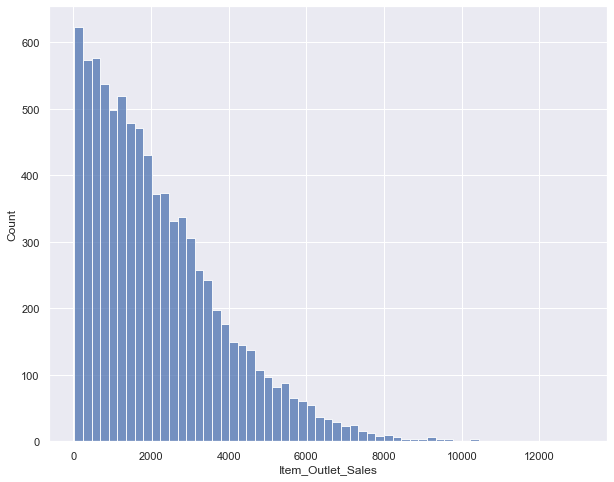

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(data=store_df, x='Item_Outlet_Sales')



### Interpretation:  As we can see, it is a right skewd variable and would need some data transformation to treat its skewness.


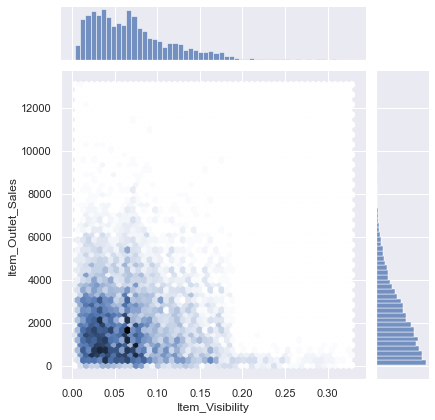

In [23]:
sns.jointplot(data=store_df, x='Item_Visibility',y='Item_Outlet_Sales',kind='hex');


### Interpretation: It is evident from the above plot that  some of products which had more visibility were not sold that much when compared with a number of products that did not have any visibility. This shows that increase in visibility does not guarantee sale.

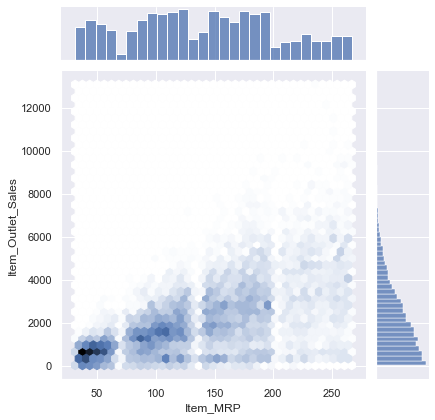

In [24]:
sns.jointplot(data=store_df, x='Item_MRP',y='Item_Outlet_Sales', kind='hex');


### Interpretation: The above plot shows that the items with least MRP are sold the most but the total sale value is much lesser when compared to the items that have more MRP.

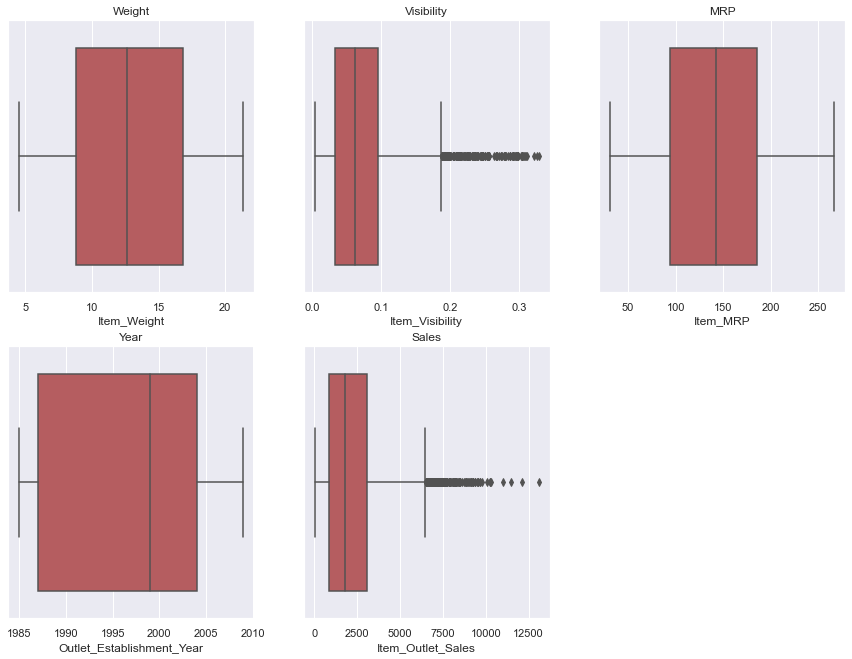

In [25]:
plt.figure(figsize=(15,11))

plt.subplot(231)
plt.title('Weight')
sns.boxplot(x = store_df['Item_Weight'], color = 'r')

plt.subplot(232)
plt.title('Visibility')
sns.boxplot(x = store_df['Item_Visibility'], color = 'r')

plt.subplot(233)
plt.title('MRP')
sns.boxplot(x = store_df['Item_MRP'], color = 'r')

plt.subplot(234)
plt.title('Year')
sns.boxplot(x = store_df['Outlet_Establishment_Year'], color = 'r')

plt.subplot(235)
plt.title('Sales')
sns.boxplot(x = store_df['Item_Outlet_Sales'], color = 'r')
plt.show()

### Interpretation: Item visibility and item outlet sales have alot of outliers. 

In [31]:
def pie(X):
    
    pie=store_df.groupby(by=X).sum()
    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
    plt.pie(labels=pie.index, x=pie['Item_Outlet_Sales'], explode=[0.03]*len(pie.index) , autopct="%.2f", colors=colors);
    

    return

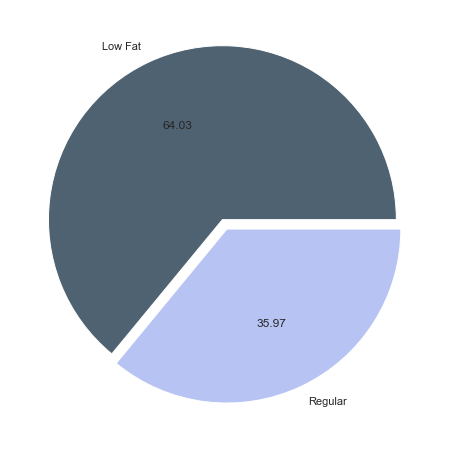

In [32]:
pie('Item_Fat_Content')


### Interpretation: Low Fat products seems to have performed well when compared to the Regular counterparts.  This pie chart tells that the people tend to prefer Low Fat products rather than regular ones.

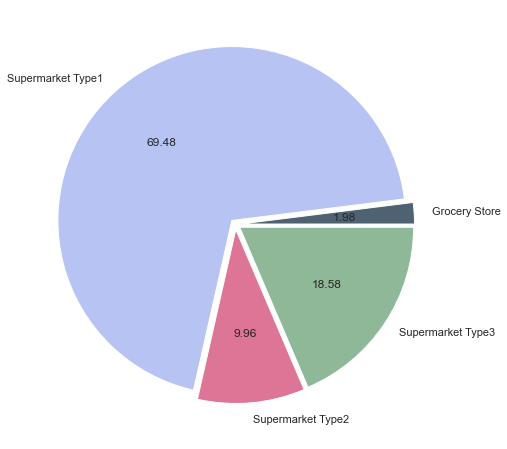

In [33]:
pie('Outlet_Type')


### Interpretation: Seems like most of the sales is generated by SuperMarket Type 1 stores and  least sales are generated by the Grocery Stores.

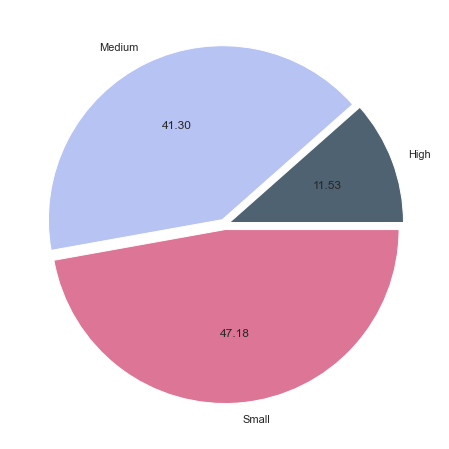

In [34]:
pie('Outlet_Size')


### Interpretation: Most sales is generated by Small stores followed by the medium stores. 

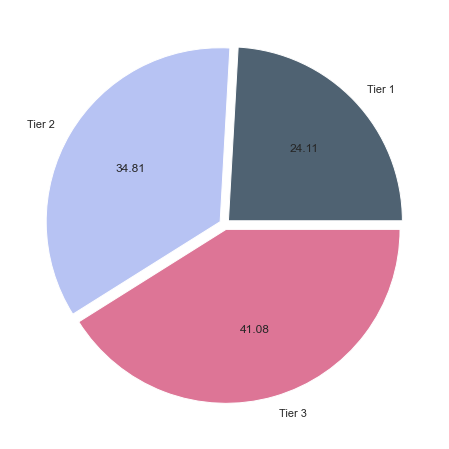

In [35]:
pie('Outlet_Location_Type')


### Interpretation: Tier 3 stores have highest sales followed by Tier 2.

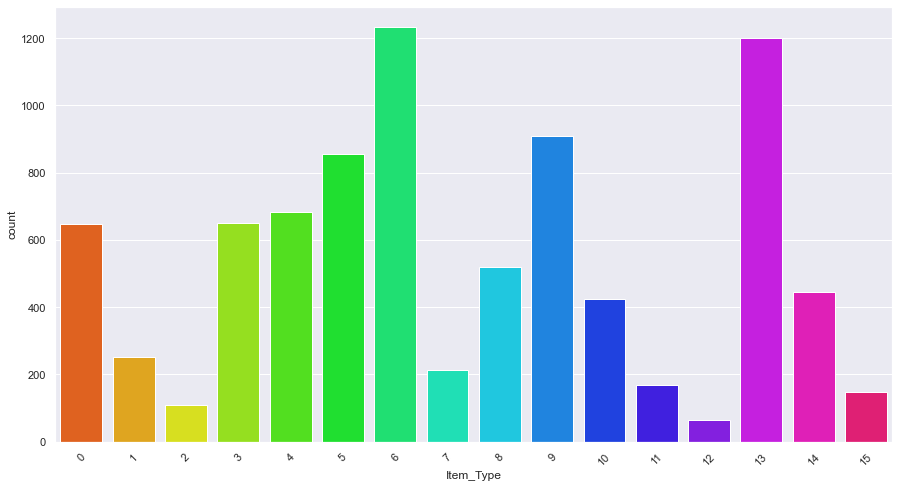

In [183]:
plt.figure(figsize= (15, 8))
plt.xticks(rotation = 45)
sns.countplot(x = store_df['Item_Type'],palette = 'hsv')
plt.show()


### Interpretation: Fruits and Vegetables have highest sales followed by Snack foods. Whereas, Seafood has lowest.

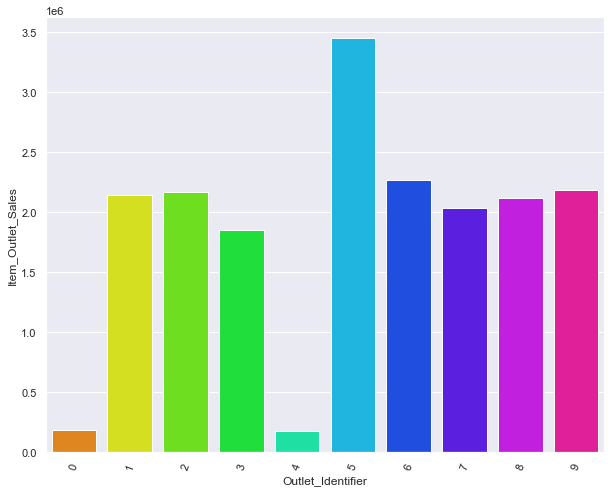

In [184]:
bar=store_df.groupby(by='Outlet_Identifier').sum()
sns.barplot(data=bar,x=bar.index,y='Item_Outlet_Sales', palette = 'hsv');
plt.xticks(rotation=70);

### Interpretation: Outlet OUT027 has achieved the highest sales whereas OUT019 and OUT10 have achieved the lowest sales.



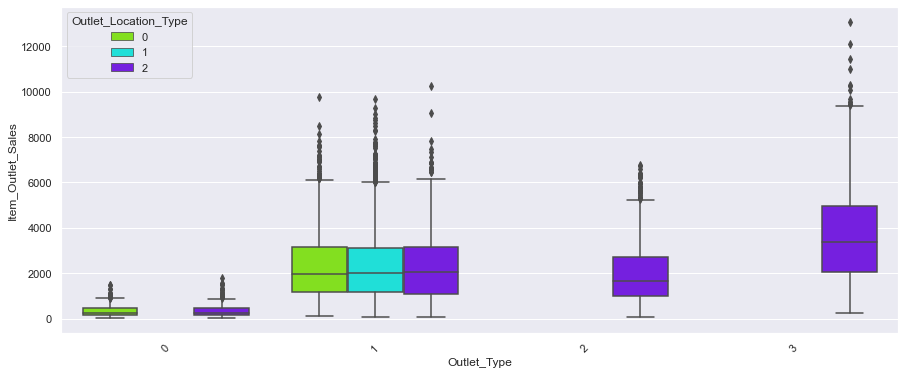

In [185]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
sns.boxplot(data =store_df, x='Outlet_Type',y='Item_Outlet_Sales', hue ='Outlet_Location_Type', palette = 'hsv')
plt.show()

### Interpretation: Most of the sales is generated by SuperMarket Type 1 stores since they are present in all three Tier locations.

### Conclusions From EDA: 

1. People tend to prefer Low Fat products rather than regular ones
2. Most of the sales is generated by SuperMarket Type 1 stores
3. Most sales is generated by Small stores followed by the medium stores
4. Outlet OUT027 has achieved the highest sales
5. Some of products which had more visibility are not sold that much when compared with products that did not have any visibility.
6. Tier 3 stores have highest sales.
7. Fruits and Vegetables have highest sales.


# 3. Feature Engineering:

In [33]:
Blist

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [34]:
for i in Blist:
    store_df[i]= store_df[i].astype('category')
    

In [35]:
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 445.7 KB


### Since the number of categories are quite large, OneHotEncoding ( get dummies ) these variables will lead tovery high memory consumption and increase in training time. Hence I will use Label Encoding.

In [36]:
label_encoder = preprocessing.LabelEncoder()
for i in Blist:
    store_df[i]= label_encoder.fit_transform(store_df[i])
    

In [37]:
store_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [38]:
#CALCULATING THE SKEWNESS OF THE DATA
store_df.skew()


Item_Identifier             -0.008877
Item_Weight                  0.071014
Item_Fat_Content             0.616705
Item_Visibility              1.269169
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.655208
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

between -0.5 and 0.5: fairly symmetrical.
 
between -1 and – 0.5 or between 0.5 and 1 : moderately skewed.


less than -1 or greater than 1: highly skewed.

### Hence, we can see that most of the data is moderately or highly skewed. Hence, skewness in data exists.


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

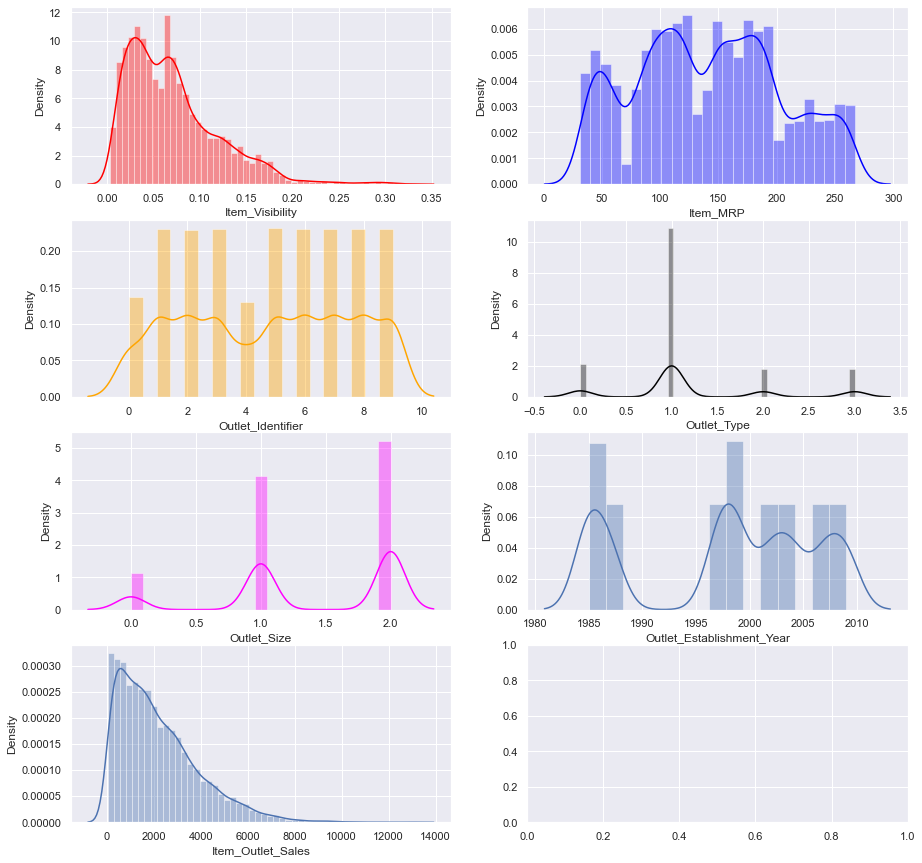

In [39]:
# Before Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(store_df["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(store_df["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(store_df["Outlet_Identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(store_df["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(store_df["Outlet_Size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(store_df["Outlet_Establishment_Year"], kde =True, ax=ax[2,1])
sns.distplot(store_df["Item_Outlet_Sales"], kde =True, ax=ax[3,0])

# 4. Feature Scaling:

In [40]:
Scaler = MinMaxScaler()
df_scaled = pd.DataFrame(Scaler.fit_transform(store_df.to_numpy()), columns =store_df.columns)
df_scaled



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0.0,0.163812,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333,0.210293
8519,0.575738,0.227746,1.0,0.133638,0.000000,0.326263,0.777778,0.708333,1.0,0.5,0.333333,0.039529
8520,0.870988,0.359929,0.0,0.097321,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333,0.088850
8521,0.437099,0.158083,1.0,0.436080,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667,0.138835


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

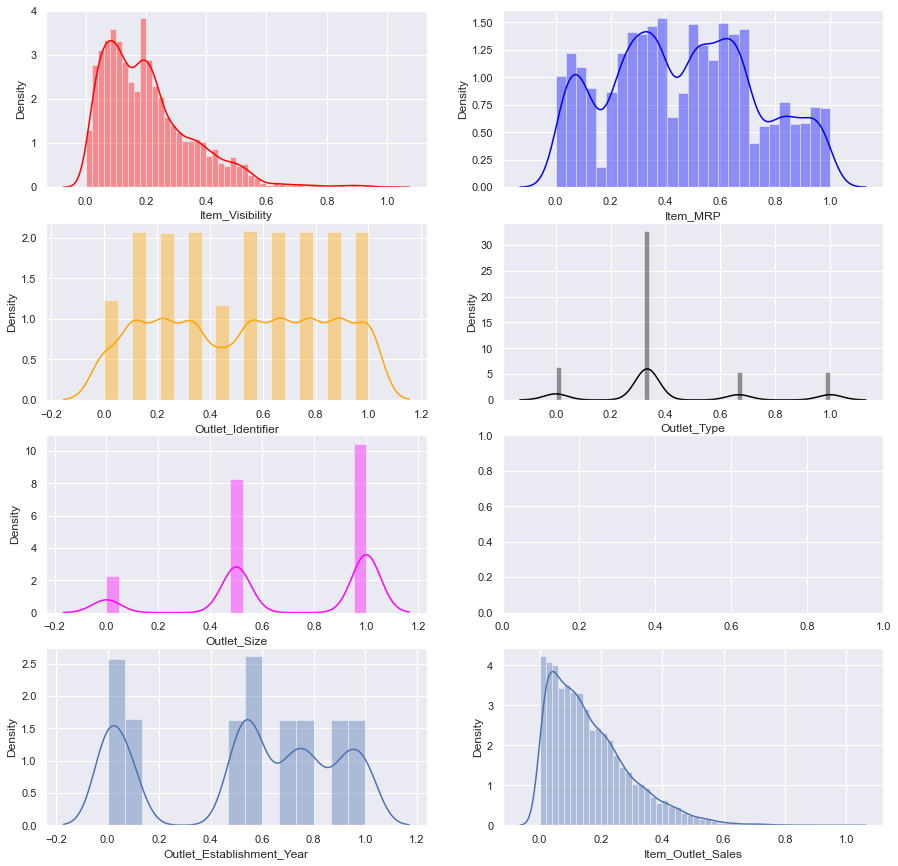

In [41]:
#AFTER Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(df_scaled["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(df_scaled["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(df_scaled["Outlet_Identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(df_scaled["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(df_scaled["Outlet_Size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(df_scaled["Outlet_Establishment_Year"], kde =True, ax=ax[3,0])
sns.distplot(df_scaled["Item_Outlet_Sales"], kde =True, ax=ax[3,1])

### After MinMax scaling, we can see that the scale has changed to 0 -1 for all, for getting all dimensions in the same scale range.


<AxesSubplot:>

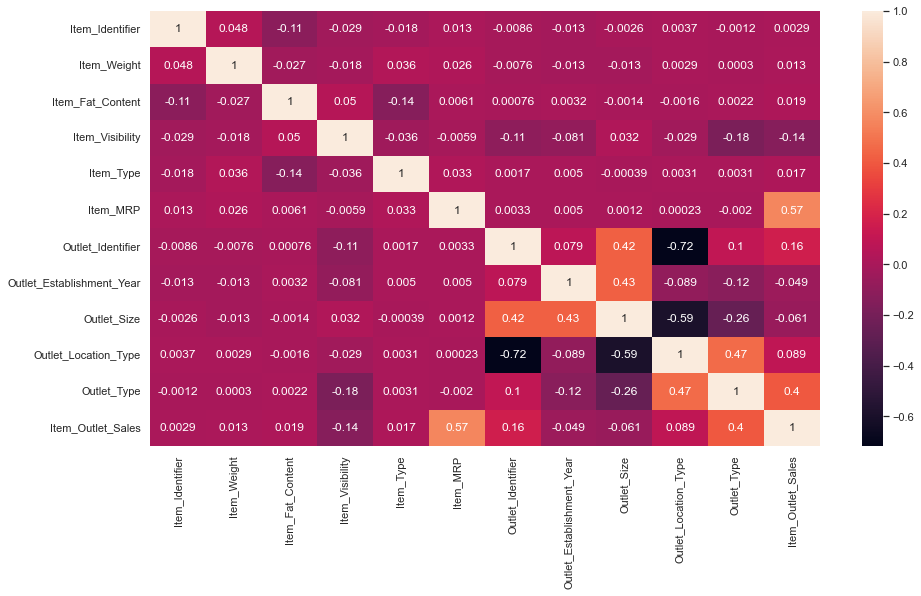

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(df_scaled.corr(), annot = True)

### From the above chart we can see that Outlet sales is positively correlated with item_mrp and outlet_type, outlet identifier, outlet location type, item fat content and item type.

# MODEL 1 : LINEAR REGRESSION

1. Using method train_test_split
2. Y is Item Outlet Slales
3. X are dimensions with high positive correlation

In [43]:
x_train, x_test, y_train, y_test= train_test_split(df_scaled[['Item_MRP', 'Outlet_Type', 'Outlet_Identifier','Outlet_Location_Type','Item_Fat_Content','Item_Type']],df_scaled[['Item_Outlet_Sales']],random_state=42, shuffle = True, test_size = 0.2)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((6818, 6), (1705, 6), (6818, 1), (1705, 1))

In [45]:
model_lr= LinearRegression().fit(x_train,y_train)
model_lr_score= model_lr.score(x_train, y_train)


In [46]:
print("----------------------- PERFORMANCE ------------------------------")
print("\n R2 value: ",model_lr_score)
print('\n Coefficient of determination:', model_lr_score)
print('\n Intercept(c):', model_lr.intercept_)
print('\n Slope(m):', model_lr.coef_)
print("\n ------------------ PREDICTED VALUES ----------------------------")
y_pred1 = model_lr.predict(x_test)
print("\n Predictions: ", y_pred1)

MSE1=mean_squared_error(y_test, y_pred1)
RMSE1 = mean_squared_error(y_test, y_pred1, squared=False)
print("----------------------- ERROR VALUES ------------------------------")
print("\n MSE value: ",MSE1)
print("\n RMSE value: ",RMSE1)


----------------------- PERFORMANCE ------------------------------

 R2 value:  0.4939054303398308

 Coefficient of determination: 0.4939054303398308

 Intercept(c): [-0.06565085]

 Slope(m): [[ 0.28134468  0.19806981  0.04230784 -0.0076653   0.00479634  0.00102396]]

 ------------------ PREDICTED VALUES ----------------------------

 Predictions:  [[0.05523692]
 [0.05216126]
 [0.06052518]
 ...
 [0.01525291]
 [0.10057032]
 [0.12285535]]
----------------------- ERROR VALUES ------------------------------

 MSE value:  0.007644071926938296

 RMSE value:  0.08743038331688988


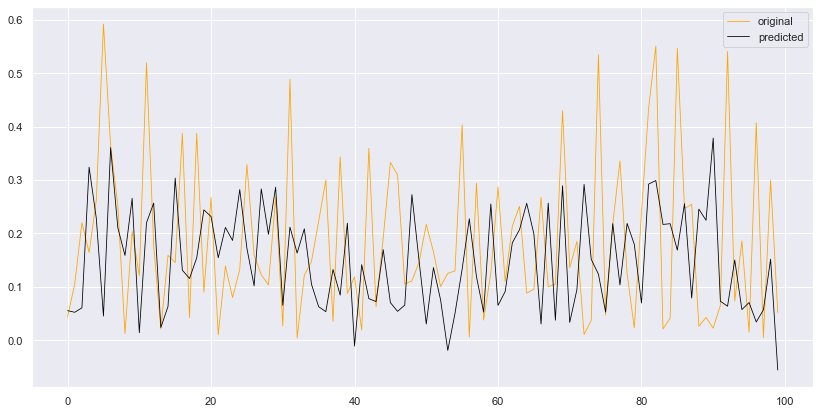

In [69]:
x_ax = range(len(y_test2[0:100]))
plt. figure(figsize=(14,7)) 
plt.plot(x_ax, y_test2[0:100],lw=0.8, color="orange", label="original")
plt.plot(x_ax, y_pred1[0:100], lw=0.8, color="black", label="predicted")
plt. legend()
plt.show()

## Interpretation: Hence we can see almost 50% deviation in actual and predicted values. 

# MODEL 2 : DECISION TREE REGRESSOR

In [72]:
A= df_scaled
X=df_scaled.drop(columns='Item_Outlet_Sales', axis =1)
y=df_scaled['Item_Outlet_Sales']

In [73]:
df_train2, df_test2 = train_test_split(A, train_size=0.7)

print('Size of training dataset: ', df_train2.shape)
print('Size of test dataset: ', df_test2.shape)


Size of training dataset:  (5966, 12)
Size of test dataset:  (2557, 12)


In [74]:
x_train2 = df_train2.drop(columns='Item_Outlet_Sales', axis =1)
y_train2 = df_train2['Item_Outlet_Sales']
x_test2 = df_test2.drop(columns='Item_Outlet_Sales', axis =1)
y_test2 = df_test2['Item_Outlet_Sales']
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape


((5966, 11), (5966,), (2557, 11), (2557,))

In [75]:
model_dt = DecisionTreeRegressor(max_depth=3,
                           min_samples_split=5,
                           max_leaf_nodes=10)

model_dt.fit(x_train2,y_train2)
print("\n R2 on train dataset= {}".format(model_dt.score(x_test2,y_test2)))
model_dt.fit(x_test2,y_test2)   
print("\n R2 on test dataset= {}".format(model_dt.score(x_test2,y_test2)))

ypred2 = model_dt.predict(x_test2)



 R2 on train dataset= 0.5188586186359407

 R2 on test dataset= 0.5447062737359814


In [76]:
def mse(value, valuetwo):
    new_value = mean_squared_error(value, valuetwo)
    print("\n MSE: ", new_value)
    print("\n RMSE : ", new_value**(1/2.0)) 
    return


In [77]:
mse(y_test2, ypred2)



 MSE:  0.00759240381425839

 RMSE :  0.08713440086589447


### Using KFold CV technique  to improve performance:

In [78]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False, random_state=None)

for train, test in kf.split(A):
     print("Train data",train,"Test data",test)
        

Train data [1705 1706 1707 ... 8520 8521 8522] Test data [   0    1    2 ... 1702 1703 1704]
Train data [   0    1    2 ... 8520 8521 8522] Test data [1705 1706 1707 ... 3407 3408 3409]
Train data [   0    1    2 ... 8520 8521 8522] Test data [3410 3411 3412 ... 5112 5113 5114]
Train data [   0    1    2 ... 8520 8521 8522] Test data [5115 5116 5117 ... 6816 6817 6818]
Train data [   0    1    2 ... 6816 6817 6818] Test data [6819 6820 6821 ... 8520 8521 8522]


In [79]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')
    

In [80]:
# We will try with max depth starting from 1 to 15 and depending on the final ‘rmse’ score choose the value of max_depth.
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import  tree

max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 0.11
For max depth: 2
rmse= 0.10
For max depth: 3
rmse= 0.09
For max depth: 4
rmse= 0.09
For max depth: 5
rmse= 0.08
For max depth: 6
rmse= 0.08
For max depth: 7
rmse= 0.09
For max depth: 8
rmse= 0.09
For max depth: 9
rmse= 0.09
For max depth: 10
rmse= 0.09
For max depth: 11
rmse= 0.10
For max depth: 12
rmse= 0.10
For max depth: 13
rmse= 0.10
For max depth: 14
rmse= 0.10
For max depth: 15
rmse= 0.11


### Choosing max depth =5, since the error is lowest at that value.

### Rebuilding the model :

In [81]:
model_dt2 = DecisionTreeRegressor(max_depth=5,
                           min_samples_split=5,
                           max_leaf_nodes=10)

print("\n \n -----------------  PERFORMANCE  -----------------")
model_dt2.fit(x_train2,y_train2)
print("R-Squared on train dataset={}".format(model_dt2.score(x_test2,y_test2)))
model_dt2.fit(x_test2,y_test2)   
print("R-Squaredon test dataset={}".format(model_dt2.score(x_test2,y_test2)))


print("\n \n -----------------  PREDICTIONS  -----------------")
ypred22 = model_dt2.predict(x_test2)
print('\n Predicted response:', ypred22, sep='\n')
      
     
print("\n \n -------------------   ERRORS  --------------------")
mse(y_test2, ypred22)




 
 -----------------  PERFORMANCE  -----------------
R-Squared on train dataset=0.5785931396132369
R-Squaredon test dataset=0.5966388239477138

 
 -----------------  PREDICTIONS  -----------------

 Predicted response:
[0.23263539 0.01489831 0.12996724 ... 0.12996724 0.12996724 0.12996724]

 
 -------------------   ERRORS  --------------------

 MSE:  0.006726385089275832

 RMSE :  0.0820145419378529


In [153]:
mse2= 0.0067
rmse2= 0.0820

## Hence, by using optimum values of max depth via hyperparameter tuning, we observe  better performance.

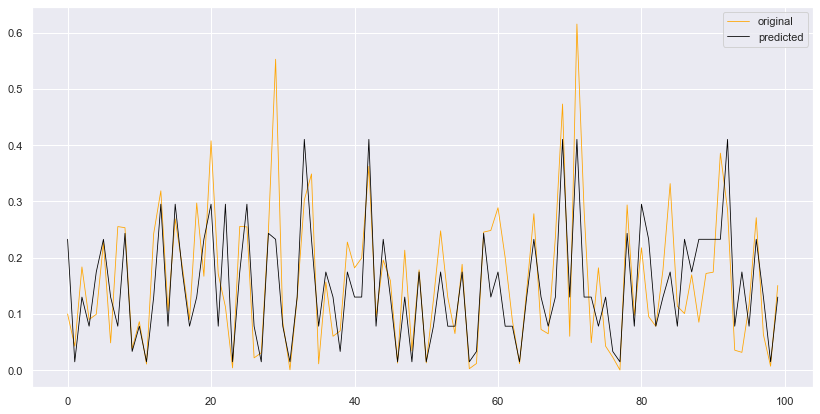

In [83]:
x_ax = range(len(y_test2[0:100]))
plt. figure(figsize=(14,7)) 
plt.plot(x_ax, y_test2[0:100],lw=0.8, color="orange", label="original")
plt.plot(x_ax, ypred22[0:100], lw=0.8, color="black", label="predicted")
plt. legend()
plt.show()

## Interpretation: Hence we can see about 40% deviation in actual and predicted values, BUT as we can see from the graph at some points the values are remaining same , constant , which is not correct acc to actual values.

# MODEL 3: RANDOM FOREST REGRESSOR 

In [103]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
regressor_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, oob_score=True)

In [105]:

print("\n \n -----------------  FITTING MODEL  ---------------")
print('\n',regressor_rf.fit(x_train2,y_train2))

print("\n \n -----------------  PERFORMANCE  -----------------")
print("\n OOB Score: ", regressor_rf.oob_score_)


print("\n \n -----------------  PREDICTIONS  -----------------")
y_pred4=regressor_rf.predict(x_test2)
print('\n Predicted response:', y_pred4, sep='\n')
      
     
print("\n \n -------------------   ERRORS  --------------------")
mse(y_test2, y_pred4)


 
 -----------------  FITTING MODEL  ---------------

 RandomForestRegressor(max_depth=7, n_jobs=-1, oob_score=True, random_state=42)

 
 -----------------  PERFORMANCE  -----------------

 OOB Score:  0.5892469744100883

 
 -----------------  PREDICTIONS  -----------------

 Predicted response:
[0.22901877 0.0170547  0.11742232 ... 0.13061702 0.11985314 0.15554251]

 
 -------------------   ERRORS  --------------------

 MSE:  0.006584960762320625

 RMSE :  0.0811477711481999


In [86]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)


In [106]:
params = {
    'max_depth': [4,5,7,8,10,20],
    'min_samples_leaf': [20,25,30,40,50,100],
    'n_estimators': [50,80,100,150,200]
}


### Using GridSearchCV for obtaining optimum values for the parameters:

In [107]:
from sklearn.model_selection import GridSearchCV


In [108]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="neg_mean_squared_error")


In [109]:
%%time
grid_search.fit(x_train2, y_train2)


Fitting 3 folds for each of 180 candidates, totalling 540 fits
CPU times: user 2.8 s, sys: 415 ms, total: 3.21 s
Wall time: 1min 2s


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 7, 8, 10, 20],
                         'min_samples_leaf': [20, 25, 30, 40, 50, 100],
                         'n_estimators': [50, 80, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [110]:
grid_search.best_score_


-0.006979392332940375

In [111]:
rf_best = grid_search.best_estimator_
rf_best


RandomForestRegressor(max_depth=5, min_samples_leaf=40, n_estimators=200,
                      n_jobs=-1, random_state=42)

### Rebuilding the model:

In [113]:
regressor_rf2 = RandomForestRegressor(random_state=42, min_samples_leaf=40,n_jobs=-1, max_depth=5, n_estimators=200, oob_score=True)



print("\n \n -----------------  FITTING MODEL  ---------------")
print('\n',regressor_rf2.fit(x_train2,y_train2))

print("\n \n -----------------  PERFORMANCE  -----------------")
print("\n OOB Score: ", regressor_rf2.oob_score_)



print("\n \n -----------------  PREDICTIONS  -----------------")
y_pred4=regressor_rf2.predict(x_test2)
print('\n Predicted response:', y_pred4, sep='\n')
      
     

print("\n \n -------------------   ERRORS  --------------------")
mse(y_test2, y_pred4)



 
 -----------------  FITTING MODEL  ---------------

 RandomForestRegressor(max_depth=5, min_samples_leaf=40, n_estimators=200,
                      n_jobs=-1, oob_score=True, random_state=42)

 
 -----------------  PERFORMANCE  -----------------

 OOB Score:  0.5955168230088932

 
 -----------------  PREDICTIONS  -----------------

 Predicted response:
[0.22862343 0.01686736 0.11564411 ... 0.12650489 0.11831465 0.15202503]

 
 -------------------   ERRORS  --------------------

 MSE:  0.006616943611057666

 RMSE :  0.0813445979217899


In [154]:
mse3= 0.0066
rmse3=0.0813

### Hence, we observe a slight improvement in performance by using optimum values obtained by GridSearchCV.

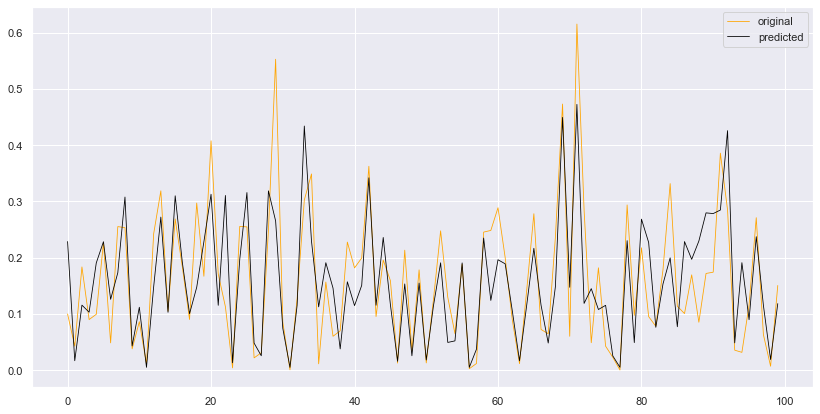

In [114]:
x_ax = range(len(y_test2[0:100]))
plt. figure(figsize=(14,7)) 
plt.plot(x_ax, y_test2[0:100],lw=0.8, color="orange", label="original")
plt.plot(x_ax, y_pred4[0:100], lw=0.8, color="black", label="predicted")
plt. legend()
plt.show()

## Hence, we observe a good graph between actual and predicted values by the model.

# MODEL 4: ADABOOST REGRESSOR

In [115]:
from sklearn.ensemble import AdaBoostRegressor

In [116]:
ad_model=AdaBoostRegressor()
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_ad=cross_val_score(ad_model,X,y,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')


print("\n \n -----------------  PERFORMANCE  -----------------")
print("\n Mean R2: ",score_ad.mean())


print("\n \n -----------------  FITTING MODEL  ---------------")
print('\n',ad_model.fit(x_train2,y_train2))


print("\n \n -----------------  PREDICTIONS  -----------------")
y_pred5=ad_model.predict(x_test2)
print('\n Predicted response:', y_pred5, sep='\n')

print("\n \n -------------------   ERRORS  --------------------")
mse(y_test2, y_pred5)






 
 -----------------  PERFORMANCE  -----------------

 Mean R2:  0.4416842337910902

 
 -----------------  FITTING MODEL  ---------------

 AdaBoostRegressor()

 
 -----------------  PREDICTIONS  -----------------

 Predicted response:
[0.29074347 0.09463838 0.13662927 ... 0.15348121 0.13662927 0.15348121]

 
 -------------------   ERRORS  --------------------

 MSE:  0.009087523166507214

 RMSE :  0.09532850133358446


In [155]:
mse4= 0.0090
rmse4= 0.0953

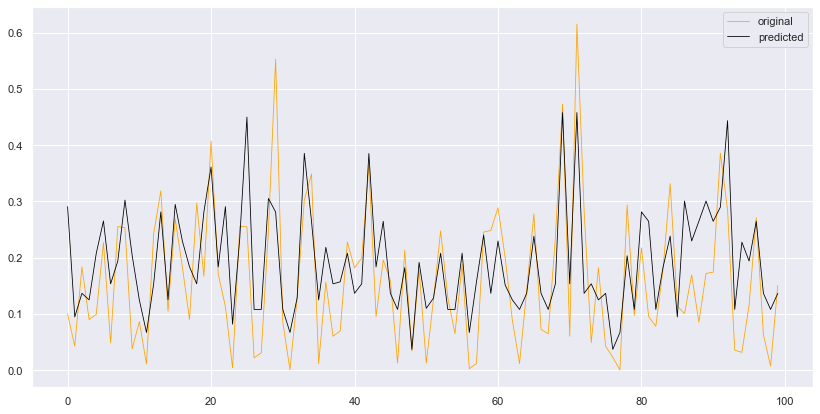

In [117]:
x_ax = range(len(y_test2[0:100]))
plt. figure(figsize=(14,7)) 
plt.plot(x_ax, y_test2[0:100],lw=0.8, color="orange", label="original")
plt.plot(x_ax, y_pred5[0:100], lw=0.8, color="black", label="predicted")
plt. legend()
plt.show()

## Interpretation: Hence we can see almost 60% deviation in actual and predicted values which is not good performance.

# MODEL 5 : STACKING REGRESSOR

In [121]:
def stacking2():
    level0=[]
    level0.append(('lr', LinearRegression()))
    level0.append(('rf', RandomForestRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level1=LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator= level1, cv=5)
    return model

In [138]:
stack_model2=stacking2()
cv=RepeatedKFold(n_splits=4,n_repeats=4)
score_stacked=cross_val_score(stack_model2,X,y,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')


print("\n \n -----------------  PERFORMANCE  -----------------")
print("\n Mean R2: ",score_stacked.mean())


print("\n \n -----------------  FITTING MODEL  ---------------")
print('\n',stack_model2.fit(x_train2,y_train2))


print("\n \n -----------------  PREDICTIONS  -----------------")
y_pred6=ad_model.predict(x_test2)
print('\n Predicted response:', y_pred6, sep='\n')

print("\n \n -------------------  ERRORS  ---------------------")
mse(y_test2, y_pred6)



 
 -----------------  PERFORMANCE  -----------------

 Mean R2:  0.5832105841404458

 
 -----------------  FITTING MODEL  ---------------

 StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

 
 -----------------  PREDICTIONS  -----------------

 Predicted response:
[0.29074347 0.09463838 0.13662927 ... 0.15348121 0.13662927 0.15348121]

 
 -------------------  ERRORS  ---------------------

 MSE:  0.009087523166507214

 RMSE :  0.09532850133358446


In [156]:
mse5= 0.0090
rmse5= 0.0953

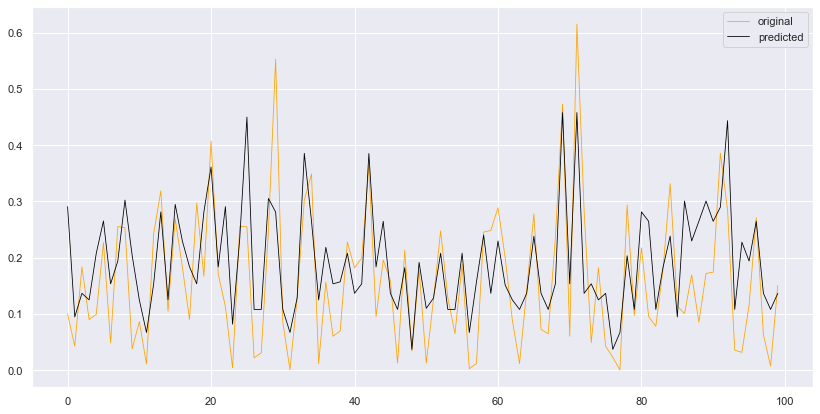

In [139]:
x_ax = range(len(y_test2[0:100]))
plt. figure(figsize=(14,7)) 
plt.plot(x_ax, y_test2[0:100],lw=0.8, color="orange", label="original")
plt.plot(x_ax, y_pred6[0:100], lw=0.8, color="black", label="predicted")
plt. legend()
plt.show()

## Interpretation: Hence we can see almost 40% deviation in actual and predicted values with a good graph.

In [148]:
results=list()
names=list()

In [149]:
results.append(model_lr_score)
names.append('LinearRegression')
results.append(model_dt2.score(x_test2,y_test2))
names.append('DecisionTree')
results.append(regressor_rf2.oob_score_)
names.append('RandomForest')
results.append(score_ad.mean())
names.append('AdaBoost')
results.append(score_stacked.mean())
names.append('Stacking')


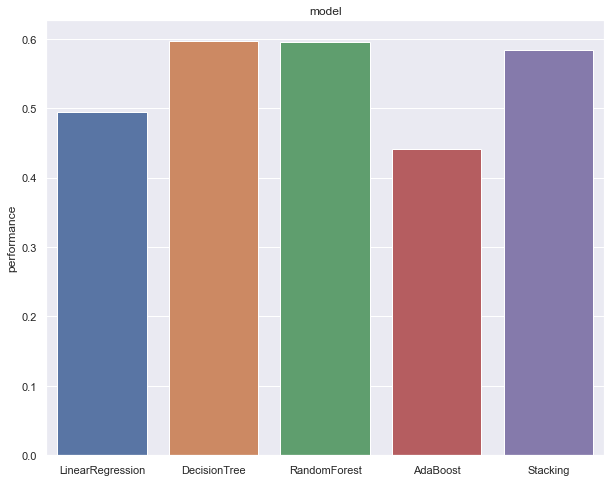

In [150]:
import seaborn as sns
sns.barplot(names,results);
plt.ylabel('performance')
plt.title('model');

In [159]:
from tabulate import tabulate

data=[["LinearRegression",model_lr_score, MSE1,RMSE1],
      ["DecisionTree",model_dt2.score(x_test2,y_test2), mse2,rmse2],
     ["RandomForest",regressor_rf2.oob_score_, mse3,rmse3],
      ["AdaBoost",score_ad.mean(), mse4,rmse4],
    ["Stacking",score_stacked.mean(), mse5,rmse5]]
head=["MODEL","PERFORMANCE","MSE","RMSE"]
print(tabulate(data, headers=head, tablefmt="grid"))



+------------------+---------------+------------+-----------+
| MODEL            |   PERFORMANCE |        MSE |      RMSE |
+==================+===============+============+===========+
| LinearRegression |      0.493905 | 0.00764407 | 0.0874304 |
+------------------+---------------+------------+-----------+
| DecisionTree     |      0.596639 | 0.0067     | 0.082     |
+------------------+---------------+------------+-----------+
| RandomForest     |      0.595517 | 0.0066     | 0.0813    |
+------------------+---------------+------------+-----------+
| AdaBoost         |      0.441684 | 0.009      | 0.0953    |
+------------------+---------------+------------+-----------+
| Stacking         |      0.583211 | 0.009      | 0.0953    |
+------------------+---------------+------------+-----------+


# 

## CONCLUSION: Hence, we can observe that DECISION TREE, RANDOM FOREST and STACKING have given us the best results. But, DT had predicted constant values for some intervals so it can't be taken in account.RANDOM FOREST has the lowest error values and highest performance followed by STACKING. Hence, RANDOM FOREST and STACKING are apt choices.

# 

## PREDICTING SALES  FOR THE NULL VALUES DF : 

In [160]:
test_store_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [161]:
label_encoder = preprocessing.LabelEncoder()
for i in test_store_df:
    test_store_df[i]= label_encoder.fit_transform(test_store_df[i])
    

In [162]:
test_store_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,1103,404,0,65,13,1460,9,4,1,0,1,0
8524,1067,224,1,1713,4,965,2,7,2,1,1,0
8525,1406,338,0,4046,11,4076,0,3,1,2,0,0
8526,809,157,0,387,13,2522,2,7,2,1,1,0
8527,1184,328,1,4427,4,3972,5,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,231,294,1,289,13,2164,8,2,2,0,1,0
14200,306,179,1,4819,15,2833,3,8,1,2,2,0
14201,1412,289,0,3258,8,1752,7,5,2,1,1,0
14202,517,349,1,2932,3,3691,2,7,2,1,1,0


In [168]:
Scaler = MinMaxScaler()
df_scaled_test = pd.DataFrame(Scaler.fit_transform(test_store_df.to_numpy()), columns =store_df.columns)
df_scaled_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.715305,0.985366,0.0,0.012311,0.866667,0.331743,1.000000,0.500,0.5,0.0,0.333333,0.0
1,0.691958,0.546341,1.0,0.324432,0.266667,0.219268,0.222222,0.875,1.0,0.5,0.333333,0.0
2,0.911803,0.824390,0.0,0.766288,0.733333,0.926153,0.000000,0.375,0.5,1.0,0.000000,0.0
3,0.524643,0.382927,0.0,0.073295,0.866667,0.573052,0.222222,0.875,1.0,0.5,0.333333,0.0
4,0.767834,0.800000,1.0,0.838447,0.266667,0.902522,0.555556,0.000,0.5,1.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.149805,0.717073,1.0,0.054735,0.866667,0.491706,0.888889,0.250,1.0,0.0,0.333333,0.0
5677,0.198444,0.436585,1.0,0.912689,1.000000,0.643717,0.333333,1.000,0.5,1.0,0.666667,0.0
5678,0.915694,0.704878,0.0,0.617045,0.533333,0.398091,0.777778,0.625,1.0,0.5,0.333333,0.0
5679,0.335279,0.851220,1.0,0.555303,0.200000,0.838673,0.222222,0.875,1.0,0.5,0.333333,0.0


In [169]:
df_traint, df_testt = train_test_split(df_scaled_test, train_size=0.7)

print('Size of training dataset: ', df_traint.shape)
print('Size of test dataset: ', df_testt.shape)


Size of training dataset:  (3976, 12)
Size of test dataset:  (1705, 12)


In [170]:
x_train_test = df_traint.drop(columns='Item_Outlet_Sales', axis =1)
y_train_test = df_traint['Item_Outlet_Sales']
x_test_test = df_testt.drop(columns='Item_Outlet_Sales', axis =1)
y_test_test = df_testt['Item_Outlet_Sales']
x_train_test.shape, y_train_test.shape, x_test_test.shape, y_test_test.shape

((3976, 11), (3976,), (1705, 11), (1705,))

In [172]:
item_outsale_pred = regressor_rf2.predict(x_test_test)

In [173]:
item_outsale_pred

array([0.10210588, 0.08979265, 0.28972699, ..., 0.23920525, 0.11976104,
       0.2162872 ])

In [174]:
item_outsale_pred.reshape(-1,1)

array([[0.10210588],
       [0.08979265],
       [0.28972699],
       ...,
       [0.23920525],
       [0.11976104],
       [0.2162872 ]])

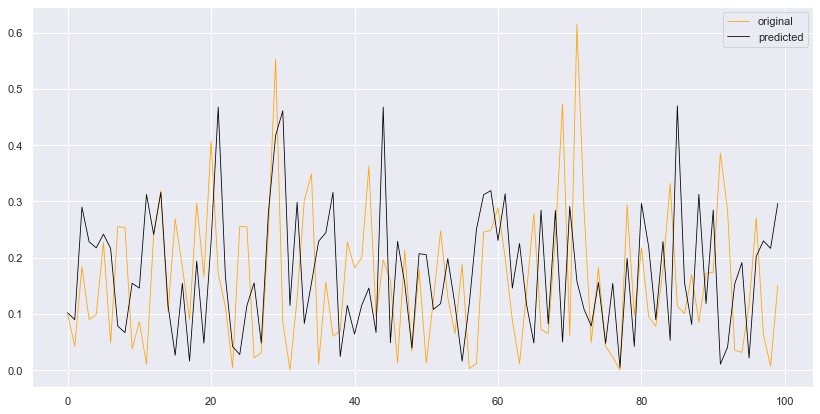

In [175]:
x_ax = range(len(y_test2[0:100]))
plt. figure(figsize=(14,7)) 
plt.plot(x_ax, y_test2[0:100],lw=0.8, color="orange", label="original")
plt.plot(x_ax, item_outsale_pred[0:100], lw=0.8, color="black", label="predicted")
plt. legend()
plt.show()

# The model I chose here is Random Forest with 60% performance, the performance score is such because of the skewness in the data. The performance can be improved by removing skewness in the data by using various transformation techniques like Sqrt and log transformation.

## If there's too much skewness in the data, then many statistical models don't work effectively. In skewed data, the tail region may act as an outlier for the statistical model, and we know that outliers adversely affect a model's performance, especially regression-based models. 
